In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Reshape, Dropout, Dense, Flatten, BatchNormalization, Conv2D, MaxPooling2D,BatchNormalization
from tensorflow.keras.optimizers import RMSprop
from PIL import Image 
from tensorflow.keras.optimizers import Adam, SGD, RMSprop

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/mohinhsudoku/sudoku.h5
/kaggle/input/sudoku/sudoku.csv


In [2]:
model = keras.models.load_model('../input/mohinhsudoku/sudoku.h5')

2022-10-08 05:50:35.058219: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [3]:
df = pd.read_csv('../input/sudoku/sudoku.csv')
df.head()

,quizzes,solutions
0,0043002090050090010700600430060020871900074000...,8643712593258497619712658434361925871986574322...
1,0401000501070039605200080000000000170009068008...,3461792581875239645296483719658324174729168358...
2,6001203840084590720000060050002640300700800069...,6951273841384596727248369158512647392739815469...
3,4972000001004000050000160986203000403009000000...,4972583161864397252537164986293815473759641828...
4,0059103080094030600275001000300002010008200070...,4659123781894735623275681497386452919548216372...


In [4]:
X = np.array(df.quizzes.map(lambda x: list(map(int, x))).to_list())
Y = np.array(df.solutions.map(lambda x: list(map(int, x))).to_list())

In [5]:
X = X.reshape(-1, 9, 9, 1)
Y = Y.reshape(-1, 9, 9) - 1

In [6]:
X.shape, Y.shape

((1000000, 9, 9, 1), (1000000, 9, 9))

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2)

In [7]:
X_train.shape, X_val.shape

((640000, 9, 9, 1), (160000, 9, 9, 1))

In [8]:
model = Sequential()
model.add(Conv2D(64, 3, activation='relu', padding='same', input_shape=(9,9,1)))
model.add(BatchNormalization())
model.add(Conv2D(64, 3, activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(128, 1, activation='relu', padding='same'))
model.add(Flatten())
model.add(Dense(81*9))
model.add(Reshape((9, 9, 9)))
model.add(Activation('softmax'))

model.compile(loss='sparse_categorical_crossentropy', 
                optimizer=Adam(
                learning_rate=0.001
    ),
    metrics=['accuracy'])
model.summary()
history = model.fit(X_train, y_train, batch_size = 32, epochs = 100,validation_data=(X_test, y_test))

2022-10-03 03:58:58.238269: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-03 03:58:58.335349: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-03 03:58:58.336127: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-03 03:58:58.337261: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 9, 9, 64)          640       
_________________________________________________________________
batch_normalization (BatchNo (None, 9, 9, 64)          256       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 9, 9, 64)          36928     
_________________________________________________________________
batch_normalization_1 (Batch (None, 9, 9, 64)          256       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 9, 9, 128)         8320      
_________________________________________________________________
flatten (Flatten)            (None, 10368)             0         
_________________________________________________________________
dense (Dense)                (None, 729)               7

2022-10-03 03:59:02.543501: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/100


2022-10-03 03:59:03.847627: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


20000/20000 [==============================] - 86s 4ms/step - loss: 0.4758 - accuracy: 0.7855 - val_loss: 0.3724 - val_accuracy: 0.8189
Epoch 2/100
20000/20000 [==============================] - 80s 4ms/step - loss: 0.3644 - accuracy: 0.8243 - val_loss: 0.3637 - val_accuracy: 0.8245
Epoch 3/100
20000/20000 [==============================] - 79s 4ms/step - loss: 0.3542 - accuracy: 0.8313 - val_loss: 0.3605 - val_accuracy: 0.8268
Epoch 4/100
20000/20000 [==============================] - 78s 4ms/step - loss: 0.3479 - accuracy: 0.8356 - val_loss: 0.3600 - val_accuracy: 0.8273
Epoch 5/100
20000/20000 [==============================] - 80s 4ms/step - loss: 0.3435 - accuracy: 0.8386 - val_loss: 0.3600 - val_accuracy: 0.8276
Epoch 6/100
20000/20000 [==============================] - 78s 4ms/step - loss: 0.3402 - accuracy: 0.8408 - val_loss: 0.3603 - val_accuracy: 0.8276
Epoch 7/100
20000/20000 [==============================] - 78s 4ms/step - loss: 0.3377 - accuracy: 0.8425 - val_loss: 0.3600

In [9]:
X_test.shape

(200000, 9, 9, 1)

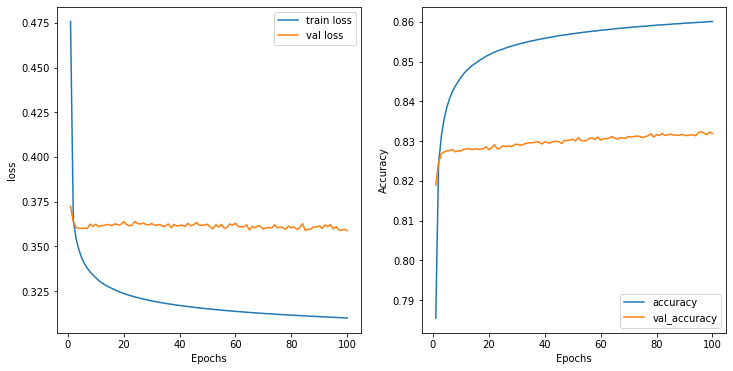

In [11]:
fig, ax = plt.subplots(1, 2)
fig.set_size_inches(12,6)
e = [i for i in range(1, 101)]
ax[0].plot(e, history.history['loss'], label='train loss')
ax[0].plot(e, history.history['val_loss'], label='val loss')
ax[0].legend()
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("loss")

ax[1].plot(e, history.history['accuracy'], label='accuracy')
ax[1].plot(e, history.history['val_accuracy'], label='val_accuracy')
ax[1].legend()
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Accuracy')
plt.show()

In [12]:
model.save('sudoku.h5')

In [7]:
# Load model
model = keras.models.load_model('../input/mohinhsudoku/sudoku.h5')

2022-10-07 07:00:28.346633: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [8]:
model.evaluate(X_val, y_val)

2022-10-07 07:00:47.296179: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


5000/5000 [==============================] - 127s 25ms/step - loss: 0.3453 - accuracy: 0.8410


[0.3453051745891571, 0.8410146832466125]

In [25]:
inp = X_train[1].reshape((9, 9)).astype(int)
inp

array([[9, 0, 0, 7, 6, 4, 2, 0, 0],
       [0, 7, 3, 0, 0, 9, 0, 0, 0],
       [4, 5, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 5, 0, 9, 8, 7, 3, 0],
       [0, 3, 0, 0, 0, 0, 0, 6, 2],
       [7, 0, 4, 1, 0, 0, 5, 8, 0],
       [0, 0, 8, 6, 4, 0, 0, 0, 1],
       [6, 0, 0, 0, 0, 3, 0, 9, 0],
       [0, 4, 2, 0, 5, 0, 0, 0, 8]])

In [26]:
grid_pred = model.predict(inp.reshape(1, 9, 9, 1)).argmax(-1)+1

In [27]:
grid_pred

array([[[9, 8, 1, 7, 6, 4, 2, 5, 3],
        [2, 7, 3, 5, 1, 9, 8, 4, 6],
        [4, 5, 6, 3, 3, 2, 9, 1, 9],
        [2, 6, 5, 4, 9, 8, 7, 3, 4],
        [8, 3, 9, 5, 7, 5, 1, 6, 2],
        [7, 9, 4, 1, 3, 6, 5, 8, 9],
        [3, 9, 8, 6, 4, 2, 3, 2, 1],
        [6, 1, 1, 8, 1, 3, 4, 9, 4],
        [3, 4, 2, 9, 5, 1, 3, 7, 8]]])

In [28]:
np.sum(grid_pred, 1)

array([[44, 52, 39, 48, 39, 40, 42, 45, 46]])

In [29]:
y_train[1].reshape((9, 9))+1

array([[9, 8, 1, 7, 6, 4, 2, 5, 3],
       [2, 7, 3, 5, 1, 9, 8, 4, 6],
       [4, 5, 6, 3, 8, 2, 9, 1, 7],
       [1, 6, 5, 2, 9, 8, 7, 3, 4],
       [8, 3, 9, 4, 7, 5, 1, 6, 2],
       [7, 2, 4, 1, 3, 6, 5, 8, 9],
       [5, 9, 8, 6, 4, 7, 3, 2, 1],
       [6, 1, 7, 8, 2, 3, 4, 9, 5],
       [3, 4, 2, 9, 5, 1, 6, 7, 8]])